<a href="https://colab.research.google.com/github/elfnrpyrz/erdos-may22-genesis/blob/main/OverfittingTechniques_June1_Model1_CNNs_for_spectrograms_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link this notebook to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!unzip /content/drive/MyDrive/spectrograms_cnn_base.zip

Streaming output truncated to the last 5000 lines.
  inflating: spectrograms_cnn_base/test/DIS/1029_ITH_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1089_IWL_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1039_MTI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1034_ITH_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1032_TIE_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1039_DFA_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1080_IWW_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1039_WSI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1068_TSI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1043_TIE_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1051_ITS_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1028_TAI_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1060_IOM_DIS_XX.png  
  inflating: spectrograms_cnn_base/test/DIS/1070_IWW_DIS_XX.png  
  inflating: spectrograms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("darkgrid")

In [ ]:
## Importing the things we need from keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Set the shape of the images to be loaded into the model:

pixel_height = 219     # This is the FIRST coordinate in the files
pixel_width = 269      # This is the SECOND coordinate in the files
channels = 3           # 3 because we're using RGB


# Type in the paths to the train, validation, and test directories here:

train_dir = 'spectrograms_cnn_base/train'
test_dir = 'spectrograms_cnn_base/test'
validation_dir = 'spectrograms_cnn_base/validation'






In [ ]:
# Same as original model, but with width shift preprocessing (fill = 'wrap'), and a dropout layer. 


model = models.Sequential()

# First conv layer, followed by pooling layer:
model.add(layers.Conv2D(16, (3, 3), activation = 'relu',
          input_shape = (pixel_height, pixel_width, channels)))

model.add(layers.MaxPooling2D((2, 2)))

# Second conv layer, followed by pooling layer:


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Third conv layer, followed by pooling layer:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Fourth conv layer, followed by pooling layer:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


# Flatten to 1d:
model.add(layers.Flatten())

# Dropout layer:
model.add(layers.Dropout(0.5))

# First dense layer, with 512 nodes:
model.add(layers.Dense(512, activation='relu'))

# Last dense layer, with 6 nodes (one per emotion):
model.add(layers.Dense(6, activation='softmax'))


















In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 217, 267, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 108, 133, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 106, 131, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 65, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 51, 63, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 31, 64)      

In [ ]:
# Compile the network

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])








In [ ]:
# Create generators that will import and preprocess spectrograms in batches:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.2,
                                   fill_mode = 'wrap') # rescale so values are between 0 and 1
test_datagen = ImageDataGenerator(rescale = 1./255)  # rescale so values are between 0 and 1

# Batch size -- this affects runtime
batch_size = 50

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (pixel_height, pixel_width),
                    batch_size = batch_size,
                    class_mode = 'categorical')


validation_generator = test_datagen.flow_from_directory(
                    validation_dir,
                    target_size = (pixel_height, pixel_width),
                    batch_size = batch_size,
                    class_mode = 'categorical')





Found 3900 images belonging to 6 classes.
Found 976 images belonging to 6 classes.


In [ ]:
# We have:
# 3900 training images
# 976 validation images

# Fit the model using the generators from above:
train_steps = 78
val_steps = 20
epochs = 30

history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_steps,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=val_steps)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  from ipykernel import kernelapp as app


Epoch 1/30
78/78 [==============================] - 299s 4s/step - loss: 1.7864 - accuracy: 0.2103 - val_loss: 1.7942 - val_accuracy: 0.1865
Epoch 2/30
78/78 [==============================] - 286s 4s/step - loss: 1.6325 - accuracy: 0.3203 - val_loss: 1.5491 - val_accuracy: 0.3791
Epoch 3/30
78/78 [==============================] - 282s 4s/step - loss: 1.5246 - accuracy: 0.3710 - val_loss: 1.4420 - val_accuracy: 0.4129
Epoch 4/30
78/78 [==============================] - 282s 4s/step - loss: 1.4822 - accuracy: 0.4092 - val_loss: 1.3719 - val_accuracy: 0.4498
Epoch 5/30
78/78 [==============================] - 280s 4s/step - loss: 1.4319 - accuracy: 0.4290 - val_loss: 1.3331 - val_accuracy: 0.4621
Epoch 6/30
78/78 [==============================] - 289s 4s/step - loss: 1.4027 - accuracy: 0.4285 - val_loss: 1.3285 - val_accuracy: 0.4744
Epoch 7/30
78/78 [==============================] - 278s 4s/step - loss: 1.3558 - accuracy: 0.4603 - val_loss: 1.3243 - val_accuracy: 0.4723
Epoch 8/30
78

In [ ]:
# Save the model:

model.save('pathname_model_1')

INFO:tensorflow:Assets written to: pathname_model_1/assets


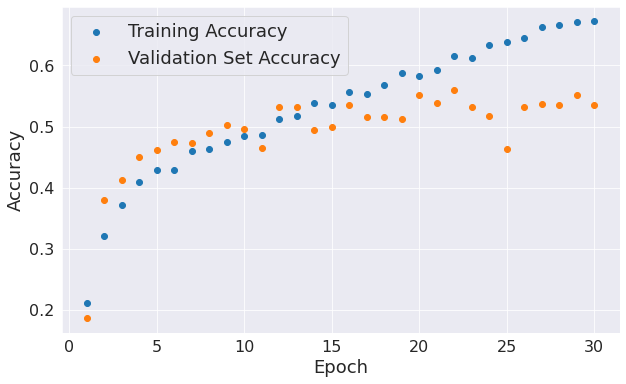

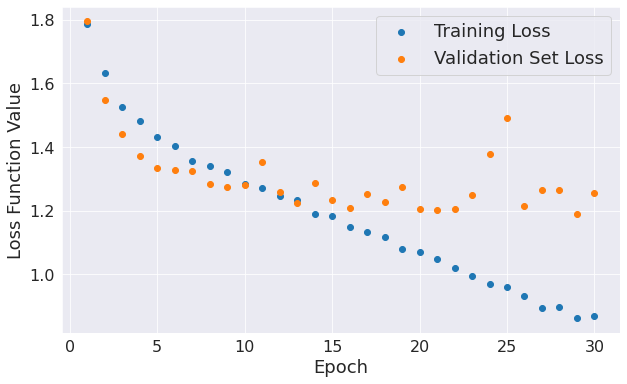

In [ ]:
history_dict = history.history

plt.figure(figsize = (10,6))

plt.scatter(range(1,epochs+1), history_dict['accuracy'], label = "Training Accuracy")
plt.scatter(range(1,epochs+1), history_dict['val_accuracy'], label = "Validation Set Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()


plt.figure(figsize = (10,6))

plt.scatter(range(1,epochs+1), history_dict['loss'], label = "Training Loss")
plt.scatter(range(1,epochs+1), history_dict['val_loss'], label = "Validation Set Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss Function Value", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()